In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('ParisHousing.csv')

In [5]:
df.head(5)

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,0,75523,three,63,9373,3,8,2005,False,True,4313,9005,956,False,7,7559081.5,Basic,has pool and no yard
1,1,80771,thirty-nine,98,39381,8,6,2015,True,False,3653,2436,128,True,2,8085989.5,Luxury,has pool and has yard
2,2,55712,fifty-eight,19,34457,6,8,2021,False,False,2937,8852,135,True,9,5574642.1,Basic,has pool and no yard
3,3,32316,forty-seven,6,27939,10,4,2012,False,True,659,7141,359,False,3,3232561.2,Basic,no pool and no yard
4,4,70429,nineteen,90,38045,3,7,1990,True,False,8435,2429,292,True,4,7055052.0,Luxury,has pool and has yard


In [9]:
df['numberOfRooms'].unique()

array(['three', 'thirty-nine', 'fifty-eight', 'forty-seven', 'nineteen',
       'thirty-six', 'ten', 'one hundred', 'forty-two', 'twenty-one',
       'seventy-four', 'thirty-one', 'forty-four', 'sixty',
       'eighty-eight', 'thirty-seven', 'forty-three', 'sixty-four',
       'twelve', 'fifty-one', 'fifty-six', 'forty-six', 'seventy-two',
       'seven', 'ninety-eight', 'forty', 'seventy-eight', 'eighty-nine',
       'twenty-nine', 'eighty-seven', 'eight', 'twenty-seven',
       'fifty-nine', 'thirty-eight', 'forty-nine', 'sixty-six',
       'twenty-two', 'ninety-seven', 'twenty-five', 'fifty-two', 'eleven',
       'six', 'eighty-two', 'seventeen', 'fifty-seven', 'nine', 'fifteen',
       'forty-eight', 'five', 'twenty-eight', 'twenty', 'sixty-seven',
       'ninety-nine', 'seventy-three', 'fifty', 'sixty-nine', 'four',
       'seventy-five', 'sixty-one', 'fifty-five', 'ninety-two',
       'twenty-three', 'ninety-three', 'seventy-one', 'thirty-five',
       'ninety-four', 'twenty-four

In [12]:
encoder = LabelEncoder()
encoder.fit(df['numberOfRooms'])
df['numberOfRooms'] = encoder.transform(df['numberOfRooms'])
df.head(5)

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,0,75523,87,63,9373,3,8,2005,False,True,4313,9005,956,False,7,7559081.5,Basic,has pool and no yard
1,1,80771,81,98,39381,8,6,2015,True,False,3653,2436,128,True,2,8085989.5,Luxury,has pool and has yard
2,2,55712,15,19,34457,6,8,2021,False,False,2937,8852,135,True,9,5574642.1,Basic,has pool and no yard
3,3,32316,31,6,27939,10,4,2012,False,True,659,7141,359,False,3,3232561.2,Basic,no pool and no yard
4,4,70429,38,90,38045,3,7,1990,True,False,8435,2429,292,True,4,7055052.0,Luxury,has pool and has yard


In [14]:
def bool_to_int(value):
    if value == True:
        return 1
    else:
        return 0

In [19]:
df['isNewBuilt'] = df['isNewBuilt'].apply(bool_to_int)
df['hasStormProtector'] = df['hasStormProtector'].apply(bool_to_int)
df['hasStorageRoom'] = df['hasStorageRoom'].apply(bool_to_int)
df.head(5)

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,0,75523,87,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic,has pool and no yard
1,1,80771,81,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury,has pool and has yard
2,2,55712,15,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic,has pool and no yard
3,3,32316,31,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic,no pool and no yard
4,4,70429,38,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury,has pool and has yard


In [21]:
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe.head(5)

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category_Luxury,PoolAndYard_has pool and no yard,PoolAndYard_no pool and has yard,PoolAndYard_no pool and no yard
0,0,75523,87,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,0,1,0,0
1,1,80771,81,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,1,0,0,0
2,2,55712,15,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,0,1,0,0
3,3,32316,31,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,0,0,0,1
4,4,70429,38,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,1,0,0,0


In [23]:
distortion = []
K = range(20, 200, 20)
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(df_ohe)
    distortion.append(model.inertia_) 

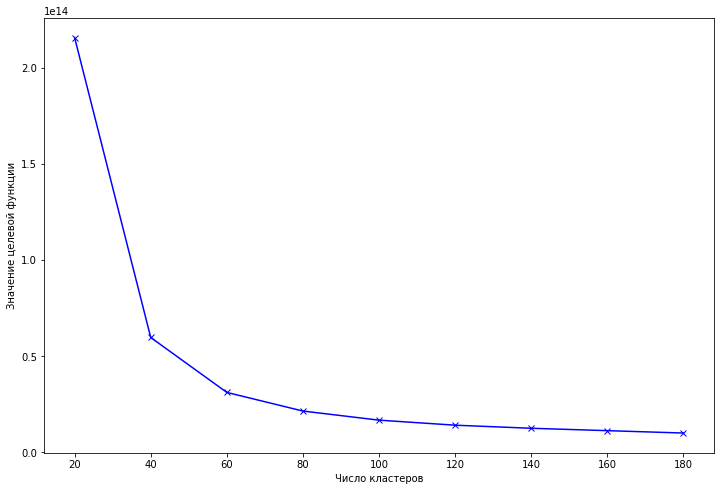

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(K, distortion, 'bx-')
plt.xlabel('Число кластеров')
plt.ylabel('Значение целевой функции')
plt.show() 